<a href="https://colab.research.google.com/github/zeepdolgin/Projects-in-Programming/blob/main/Arseniy_Dolgin_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Food, Halloween, and Analytics

In this assignment you will practice crawling to fetch data from a website (allrecipes.com).

You will then put your data into a Pandas dataframe and perform some analysis of the fetched recipes.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from lxml import html
from xml.etree import ElementTree
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import statsmodels.formula.api as smf
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Task 1: Crawl AllRecipes.com

We are getting ready for Halloween, and we want to cook some good food. No, good is not good enough. We want to first the BEST recipe for Heloween.

But to find the best recipe, we need data.

After a 1-min Google search, we find [a page that contains recipes for Halloween](https://www.allrecipes.com/recipes/189/holidays-and-events/halloween/). From a quick look on the webpage, we see that, for each recipe we have a title, a recipe URL, a brief description, a star rating, the number of reviews, and the name of the authors of the reciept.


So, you need to write a crawler that will parse AllRecipes and fetch these data for the recipes. For this assignment, we will only fetch the data from the recipes from the results page; we will not fetch the recipes themselves.

In [ ]:
# Template code to get you started. This code gets as input an HTML page
# and extracts the list of recipes that are listed there.

def get_recipes_from_page(url):
    doc = html.fromstring(requests.get(url).text)
    recipes = doc.xpath('//div[@class="component card card__category"]')
    result = []
    for r in recipes:

        # DEBUGING CODE. Use it to print out the HTML of the "recipe card"
        # html_str = ElementTree.tostring(r).decode()
        # print(html_str)
        # print("=============================\n=============================")
        # continue

        # As a freebie, this is the code that counts the number
        # of stars for the recipe by counting the number of
        # "span" elements with class being "rating-star active"
        # If there are no stars, that entry is not a recipe, and
        # we do not add the entry in the results
        rating = len(r.xpath('.//span[@class="rating-star active"]'))
        if rating == 0:
          continue

        ### WRITE YOUR CODE HERE.
        # Your XPath queries should identify the corresponding parts of the page
        # that contain the information that you need.
        title = r.xpath('.//h3[@class="card__title"]/text()')[0]
        title = re.sub('\s+',' ',title)


        recipe_url = str(r.xpath('.//a[@class="card__titleLink manual-link-behavior"]/@href')[0])


        description = r.xpath('.//div[@class="card__summary"]/text()')[0]
        description = re.sub('\s+',' ',description)


        num_reviews = r.xpath('.//span[@class="card__ratingCount card__metaDetailText"]/text()')[0]
        num_reviews = int(re.sub('/s+',' ', num_reviews))

        author = str(r.xpath('.//span[@class="card__authorName"]/text()')[0])

        entry = {
            'title' : title,
            'recipe_url' : recipe_url,
            'description' : description,
            'rating' : rating,
            'reviews' : int(num_reviews),
            'author' : author
        }
        result.append(entry)

    return result


In [ ]:
test_url = 'https://www.allrecipes.com/recipes/1090/fruits-and-vegetables/vegetables/squash/winter-squash/pumpkin/'
get_recipes_from_page(test_url)

[{'author': 'JES55',
  'description': ' What better way to celebrate fall than with delicious muffins that combine the wonderful texture of apples with the warm taste of pumpkin. A simple streusel topping gives them a little something extra. ',
  'rating': 5,
  'recipe_url': 'https://www.allrecipes.com/recipe/20237/pumpkin-apple-streusel-muffins/',
  'reviews': 962,
  'title': ' Pumpkin Apple Streusel Muffins '},
 {'author': 'Kathy',
  'description': ' A very easy and great tasting soup. ',
  'rating': 4,
  'recipe_url': 'https://www.allrecipes.com/recipe/13473/harvest-pumpkin-soup/',
  'reviews': 75,
  'title': ' Harvest Pumpkin Soup '},
 {'author': 'Chef John',
  'description': ' This basic pancake recipe turns into a delicious holiday breakfast simply by adding pumpkin and some fall spices! ',
  'rating': 5,
  'recipe_url': 'https://www.allrecipes.com/recipe/219167/chef-johns-pumpkin-pancakes/',
  'reviews': 250,
  'title': " Chef John's Pumpkin Pancakes "},
 {'author': 'Renee',
  '

In [ ]:
# Create a dataframe with the recipes just to check that we have things right
df = pd.DataFrame(get_recipes_from_page(test_url))
df

,title,recipe_url,description,rating,reviews,author
0,Pumpkin Apple Streusel Muffins,https://www.allrecipes.com/recipe/20237/pumpki...,What better way to celebrate fall than with d...,5,962,JES55
1,Harvest Pumpkin Soup,https://www.allrecipes.com/recipe/13473/harves...,A very easy and great tasting soup.,4,75,Kathy
2,Chef John's Pumpkin Pancakes,https://www.allrecipes.com/recipe/219167/chef-...,This basic pancake recipe turns into a delici...,5,250,Chef John
3,Marbled Pumpkin Cheesecake,https://www.allrecipes.com/recipe/23046/marble...,This is a wonderful pumpkin cheesecake with a...,5,658,Renee
4,Creamy Pumpkin Sauce,https://www.allrecipes.com/recipe/245025/cream...,This sauce is great over pumpkin or cheese ra...,4,22,MegChaseWal
5,Pumpkin Sandwich Rolls,https://www.allrecipes.com/recipe/240006/pumpk...,I came up with this recipe when I wanted some...,5,2,Gremolata
6,Spicy Pumpkin Spice Latte,https://www.allrecipes.com/recipe/239223/spicy...,"I don't normally drink pumpkin spice lattes, ...",4,12,The Gruntled Gourmand
7,Pumpkin Roll Cake,https://www.allrecipes.com/recipe/8126/pumpkin...,"A thin pumpkin cake, rolled around in a white...",5,397,Stephanie
8,Perfect Pumpkin Pie,https://www.allrecipes.com/recipe/23439/perfec...,The one and only! EAGLE BRAND® makes this tra...,5,2301,Eagle brand
9,Homemade Fresh Pumpkin Pie,https://www.allrecipes.com/recipe/13711/homema...,"This recipe is made from fresh pumpkin, not c...",5,568,Nancy Scott


## Task 2: Descriptive Statistics on Recipes

We now start analyzing the recipes.

a. Use the `describe()` and `hist()` commands to analyze the contents of the `reviews` and `rating` columns.

b. Find the recipe with the highest number of reviews

c. Based on the results of the first exploratory analysis, you decide to keep only recipes more than 10 reviews, and with rating of five stars. Create a new dataframe with only these well-reviewed, and highly-rated recipes.

d. Among the recipes with 5 stars, find the one with the highest number of reviews. The command `df["reviews"].max()` returns back the highest value for the column `reviews` of the dataframe `df`.

e. Find all the recipes with more than 10 reviews, and with rating of five stars, that contain the word 'Cookie' in the title. The command `df["title"].str.contains("Cookie")` can be used for this purpose.

f. Using the dataframe from step (c), create a scatterplot that shows the number of reviews on the x-axis and the recipe rating on the y axis.

In [ ]:
## a1
df.describe()

,rating,reviews
count,34.000000,34.000000
mean,4.794118,915.058824
std,0.410426,1435.974760
min,4.000000,2.000000
25%,5.000000,185.500000
50%,5.000000,503.500000
75%,5.000000,840.250000
max,5.000000,7566.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67a993f748>,
      dtype=object)

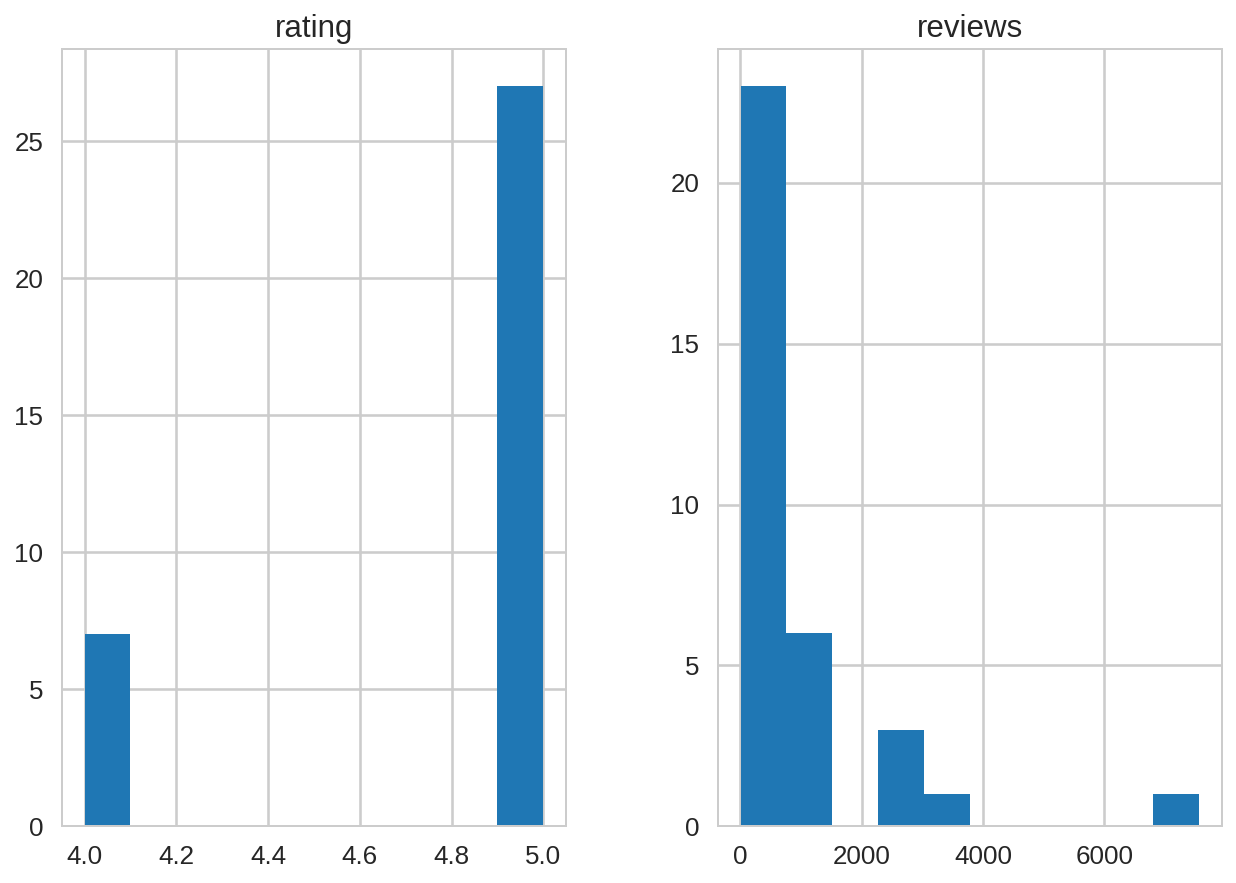

In [ ]:
## a2
df.hist()

In [ ]:
## b

recipe_highest = df.max()
print(recipe_highest)

title                               Two Ingredient Pumpkin Cake 
recipe_url     https://www.allrecipes.com/recipe/93290/easy-p...
description     Wonderful spicy iced pumpkin cookies that bot...
rating                                                         5
reviews                                                     7566
author                                              WeibellMommy
dtype: object


In [ ]:
## c  recipes more than 10 reviews, and with rating of five stars

filters = ((df['reviews'] > 10) & (df['rating'] == 5) )
wanted_recipies = df[filters]
wanted_recipies


,title,recipe_url,description,rating,reviews,author
0,Pumpkin Apple Streusel Muffins,https://www.allrecipes.com/recipe/20237/pumpki...,What better way to celebrate fall than with d...,5,962,JES55
2,Chef John's Pumpkin Pancakes,https://www.allrecipes.com/recipe/219167/chef-...,This basic pancake recipe turns into a delici...,5,250,Chef John
3,Marbled Pumpkin Cheesecake,https://www.allrecipes.com/recipe/23046/marble...,This is a wonderful pumpkin cheesecake with a...,5,658,Renee
7,Pumpkin Roll Cake,https://www.allrecipes.com/recipe/8126/pumpkin...,"A thin pumpkin cake, rolled around in a white...",5,397,Stephanie
8,Perfect Pumpkin Pie,https://www.allrecipes.com/recipe/23439/perfec...,The one and only! EAGLE BRAND® makes this tra...,5,2301,Eagle brand
9,Homemade Fresh Pumpkin Pie,https://www.allrecipes.com/recipe/13711/homema...,"This recipe is made from fresh pumpkin, not c...",5,568,Nancy Scott
10,Downeast Maine Pumpkin Bread,https://www.allrecipes.com/recipe/6820/downeas...,"This is a great old Maine recipe, moist and s...",5,7566,Laurie Bennett
11,Pumpkin Pancakes,https://www.allrecipes.com/recipe/17036/pumpki...,These are good any season but taste best on c...,5,2341,Anonymous
12,Double Layer Pumpkin Cheesecake,https://www.allrecipes.com/recipe/13477/double...,"A great alternative to pumpkin pie, especiall...",5,2946,Stephanie Phillips
13,Libby's® Famous Pumpkin Pie,https://www.allrecipes.com/recipe/22755/libbys...,Whether you're hosting a festive party or a c...,5,845,Nestle Toll House


In [ ]:
## d

five_star_highest = wanted_recipies.max()
five_star_highest

title                               Two Ingredient Pumpkin Cake 
recipe_url     https://www.allrecipes.com/recipe/8404/great-p...
description     Wonderful spicy iced pumpkin cookies that bot...
rating                                                         5
reviews                                                     7566
author                                              WeibellMommy
dtype: object

In [ ]:
## e


best_cookies_filer = wanted_recipies["title"].str.contains("Cookie")
best_cookies = wanted_recipies[best_cookies_filer]
best_cookies

,title,recipe_url,description,rating,reviews,author
18,Iced Pumpkin Cookies,https://www.allrecipes.com/recipe/10033/iced-p...,Wonderful spicy iced pumpkin cookies that bot...,5,3418,Gina


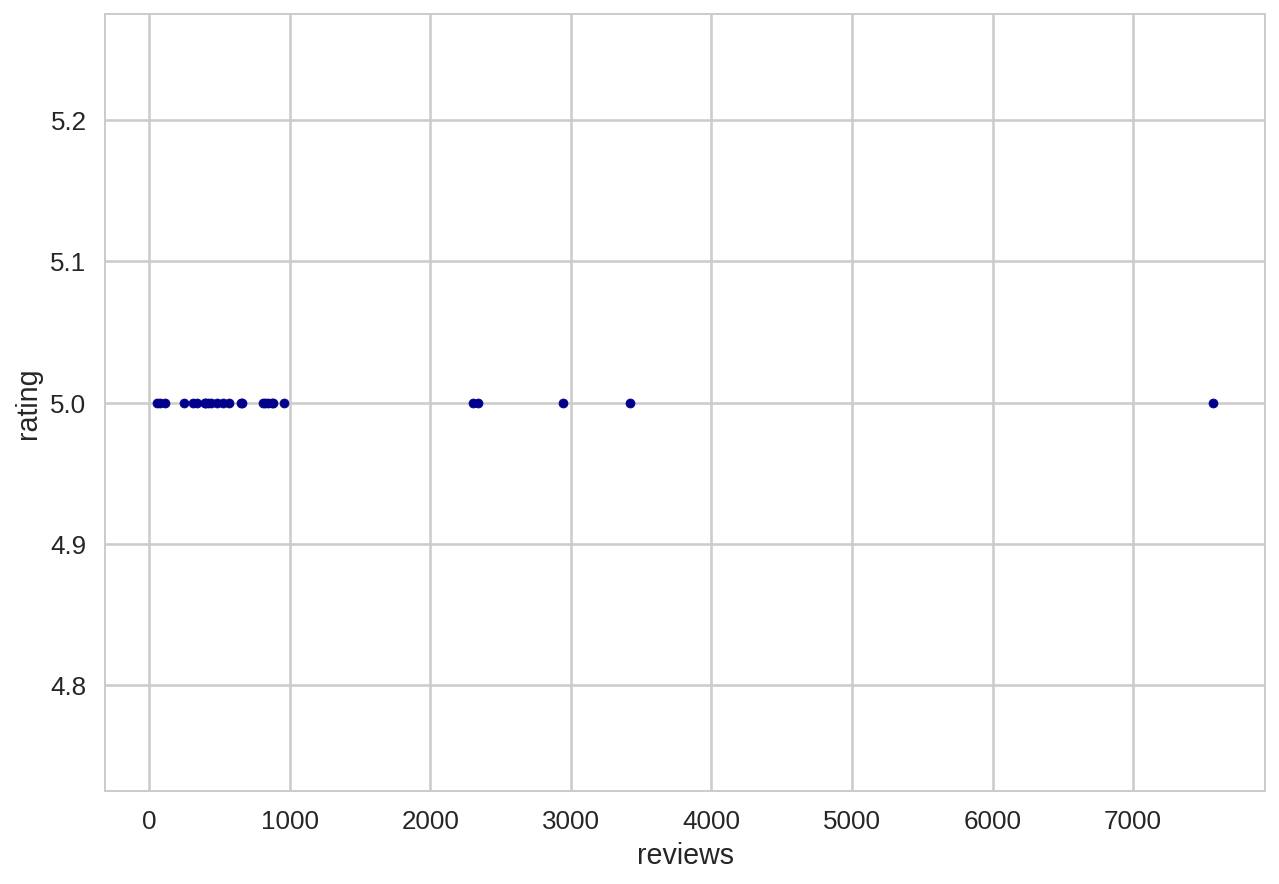

In [ ]:
## f

## Using the dataframe from step (c),
## create a scatterplot that shows the number of reviews on the x-axis and the recipe rating on the y axis.

scatter = wanted_recipies.plot.scatter(x='reviews',
                                       y='rating',
                                       c='DarkBlue')

## Task 3: Create a website that shows the recipes as a table

As a final task, you are asked to create a website that shows the data retrieved from the AllRecipes website. You will need to create a webpage that shows a table with six columns (title, recipe_url, description, rating, num_reviews, author).

When implementing the webpage, you can either pass to the template the variable that contains the list of dictionaries (and then iterate in the template to print the individual values, as we have done in class), or you can use the `to_html` function of Pandas, and print the table directly as HTML like that.

In [ ]:
!pip install flask==0.12.2
!pip install flask-ngrok




In [ ]:
from flask import Flask, render_template
from flask_ngrok import run_with_ngrok


app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def recipies():
    html = df.to_html()
    return html

app.run()






 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://ab7c41f93bfa.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [18/Nov/2020 08:33:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Nov/2020 08:33:47] "GET /favicon.ico HTTP/1.1" 404 -
